## Introduction 

If you're an active member of society, you've most likely heard of TikTok, if not post on it and watch videos. I personally watch TikToks, and have cousins as young as 9 who are on TikTok. I've seen how addictive and immersive it has become for millions of poeple. After seeing my little cousins making dance videos and learning that TikTokers are now a brand of influencers, I wanted to learn more about what really makes these videos go viral. Is there a formula that gets videos seen on the algorithm? Is it a specific type of person? A common hashtag? Having people mentioned? What is it that makes TikToks go viral? I found that there are datasets for the top 1000 trending videos, so I wanted to use data science to see if there is something algorithmically that makes these videos "blow up", as the kids on TikTok say. 

In [11]:
import json
import pandas as pd

#load the JSON from the current directory
data = json.load(open('trending.json'))

#turn the data into a pandas dataframe for easier analysis
df = pd.DataFrame(data['collector'])
df.sample(6)

,id,text,createTime,authorMeta,musicMeta,covers,webVideoUrl,videoUrl,videoUrlNoWaterMark,videoMeta,diggCount,shareCount,playCount,commentCount,downloaded,mentions,hashtags
229,6876320502848261378,Boat boat 🔥foryou❤️Mujhe bhi famous hona hai✌️...,1601018132,"{'id': '6634864752181133318', 'secUid': 'MS4wL...","{'musicId': '6824556194909195013', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@faheemsajjad07/video/6...,https://v77.tiktokcdn.com/126beb5e60b2b7859e7e...,,"{'height': 960, 'width': 540, 'duration': 14}",801,15,8223,34,True,[],"[{'id': '88764338', 'name': 'foryoupage', 'tit..."
503,6876603307708665093,Please blow this up so that my dad doesn’t mak...,1601084005,"{'id': '6811971187603719173', 'secUid': 'MS4wL...","{'musicId': '6874228157457746693', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@susi.vidal/video/68766...,https://v77.tiktokcdn.com/0b3ae50fe7673a55c98c...,,"{'height': 1024, 'width': 576, 'duration': 29}",8135,35,58000,250,True,[],"[{'id': '88764338', 'name': 'foryoupage', 'tit..."
212,6875862825932180738,මගේ උන් එක්ක අන්තිම වේනකල් බලන්න #ish @dope_ad...,1600911571,"{'id': '6609531764837711877', 'secUid': 'MS4wL...","{'musicId': '6872061043397430017', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@ish_perera/video/68758...,https://v77.tiktokcdn.com/50f4443225e0ec71b6a3...,,"{'height': 1024, 'width': 576, 'duration': 15}",9773,12,60700,105,True,"[@dope_adhi, @dope_japana]","[{'id': '35028', 'name': 'ish', 'title': '', '..."
115,6877530962742217985,Break some ankles in FIFA 21. 😉 #FIFA21 #FIFAS...,1601299962,"{'id': '6716842482229462021', 'secUid': 'MS4wL...","{'musicId': '249980696029483008', 'musicName':...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@ajaxesports/video/6877...,https://v77.tiktokcdn.com/af216778261d73f0b50d...,,"{'height': 1024, 'width': 576, 'duration': 13}",116400,15000,2700000,347,True,[],"[{'id': '87406586', 'name': 'fifa21', 'title':..."
932,6879837374927490306,මගේ බෲනෝ මැණිකගේ තාත්තා ARROW 💪,1601836966,"{'id': '6786091951809758214', 'secUid': 'MS4wL...","{'musicId': '250516688658493440', 'musicName':...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@shashika28/video/68798...,https://v77.tiktokcdn.com/b38119cc7b6af8819efe...,,"{'height': 1024, 'width': 576, 'duration': 46}",4945,22,60800,14,True,[],[]
273,6883894825855274242,АКАШИИИ#НиШагуБезDETTOL #fupシ #anime #волейбол...,1602781665,"{'id': '6866109690276692994', 'secUid': 'MS4wL...","{'musicId': '6883894836517178113', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@salamander.5/video/688...,https://v77.tiktokcdn.com/97480d75fac41c86ce6c...,,"{'height': 1024, 'width': 576, 'duration': 11}",19600,384,72700,140,True,[],"[{'id': '1645876049175557', 'name': 'fupシ', 't..."


We don't care much about anything other than views, mentions and hashtags, so we can clean the data up further

In [12]:
df.drop({'covers', 'downloaded', 'createTime', 'id', 'createTime', 'covers', 'musicMeta', 'authorMeta', \
         'webVideoUrl', 'videoUrl', 'videoUrlNoWaterMark', 'videoMeta', 'shareCount', 'diggCount', \
         'commentCount'}, axis=1, inplace=True)
df.sample(6)

,text,playCount,mentions,hashtags
118,Lopen #fyp #voorjou #dutch,58900,[],"[{'id': '229207', 'name': 'fyp', 'title': '', ..."
218,Reply to @travismendenhall3,59000,[@travismendenhall3],[]
23,#fyp #foryou #xyzbca #foryoupage #boyfriend,50400,[],"[{'id': '229207', 'name': 'fyp', 'title': '', ..."
215,#duet with @big_shiwa අලුත් එක Follow කරන්ඩෝ ...,9373,"[@big_shiwa, @pawandissanayake7]","[{'id': '30496', 'name': 'duet', 'title': 'Use..."
341,Food Shredder,6600000,[],[]
358,Sainz and his golf😎#F1 #Formula1 #F12020 #Form...,346900,[],"[{'id': '16520', 'name': 'f1', 'title': '', 'c..."


Now that we've wrangled the data and it is easier to work with, we can begin to analyze the correlation between mentions and playCount (views), and between hashtage and playCount. We can start by finding all hashtags used to see if any of them occur more than once, and doing the same with tags. We also have to take into account no tags and no mentions. 

In [13]:
tags = dict()
mentions = dict()

for index, row in df.iterrows():
    m = row['mentions']
    t = row['hashtags']
    
    for men in m: 
        if men in mentions:
            i = mentions[men]
            mentions[men] = i+1
        else:
            mentions[men] = 1
    for ta in t: 
        name = ta['name']
        if name in tags:
            i = tags[name]
            tags[name] = i+1
        else:
            tags[name] = 1
            
#now, for organization, sort the array by the value, which represents the number of occurrences. 
tags = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1])}
mentions = {k: v for k, v in sorted(mentions.items(), key=lambda item: item[1])}

i = 0
for k, v in tags.items(): 
    if i > len(tags) - 16:
        print(k, v)
    i+=1
i = 0
for k, v in mentions.items(): 
    if i > len(mentions) - 5:
        print(k, v)
    i+=1

powerlifting 39
horadearrasar 40
duet 40
transition 43
gym 49
anime 50
animeedit 63
viral 65
voorjou 72
workout 73
fitness 87
fy 116
foryoupage 174
foryou 272
fyp 417
@gymshark 2
@x 2
@emmakeuven 2
@bangenergy 2


As we can see from the hashtags, there is a strong sense of repition among them. However, for mentions, there is less repition. From this, I predict that the hashtags will have a stronger correlation to the number of views than the tags will. We can begin to graph these correlations, to see the total views per hashtag and per mention.  

In [14]:
tags_by_views = dict()
ment_by_views = dict()
notags = 0
nomentions = 0

for index, row in df.iterrows():
    t = row['hashtags']
    m = row['mentions']
    
    if m == []:
        nomentions += row['playCount']
    for mention in m: 
        if mention in ment_by_views:
            i = ment_by_views[mention]
            ment_by_views[mention] = i+row['playCount']
        else:
            ment_by_views[mention] = row['playCount']
    if t == []:
        notags += row['playCount']
    for tag in t: 
        name = tag['name']
        if name in tags_by_views:
            i = tags_by_views[name]
            tags_by_views[name] = i+row['playCount']
        else:
            tags_by_views[name] = row['playCount']

tags_by_views = {k: v for k, v in sorted(tags_by_views.items(), key=lambda item: item[1])}
mentions = {k: v for k, v in sorted(mentions.items(), key=lambda item: item[1])}

Now that we've mapped hashtag and mention frequency and the number of views by hashtag and mention, we can map out frequency vs views

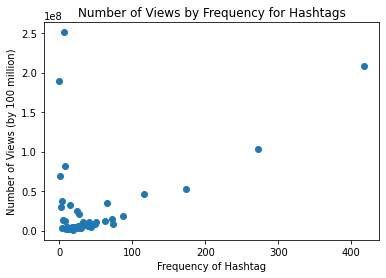

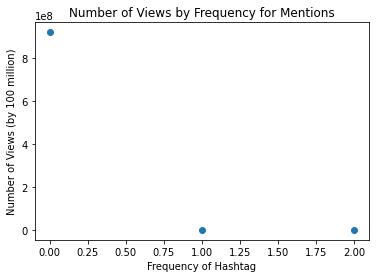

In [15]:
import matplotlib.pyplot as plt

views_by_freq_hashtag = dict()
views_by_freq_ment = dict()

for k, v in tags_by_views.items(): 
    for k2, v2 in tags.items():
        if k == k2:
            views_by_freq_hashtag[v2] = v
views_by_freq_hashtag[0] = notags

for k, v in ment_by_views.items(): 
    for k2, v2 in mentions.items():
        if k == k2:
            views_by_freq_ment[v2] = v
views_by_freq_hashtag[0] = notags
views_by_freq_ment[0] = nomentions

hashtag_views = []
hashtag_freqs = []
for k, v in views_by_freq_hashtag.items(): 
    hashtag_views.append(v)
    hashtag_freqs.append(k)
    
plt.scatter(hashtag_freqs, hashtag_views) 

plt.xlabel('Frequency of Hashtag') 
plt.ylabel('Number of Views (by 100 million)') 
plt.title('Number of Views by Frequency for Hashtags') 
    
plt.show() 

mention_views = []
mention_freqs = []
for k, v in views_by_freq_ment.items(): 
    mention_views.append(v)
    mention_freqs.append(k)
    
plt.scatter(mention_freqs, mention_views) 

plt.xlabel('Frequency of Hashtag') 
plt.ylabel('Number of Views (by 100 million)') 
plt.title('Number of Views by Frequency for Mentions') 
    
plt.show() 


From looking at these plots, we can say that the frequency of mentions has a negative correlation with the number of views. At 0, there are 800,000,000 views, but that decreases to less than 200,000,000 as the mention frequency increases to 1 and 2. However, we can see that the hashtag plot has two linear correlations, one would be that a small frequency for a hashtag increases views, and the other is that the number of views increases as the frequency of the hashtag increases. 

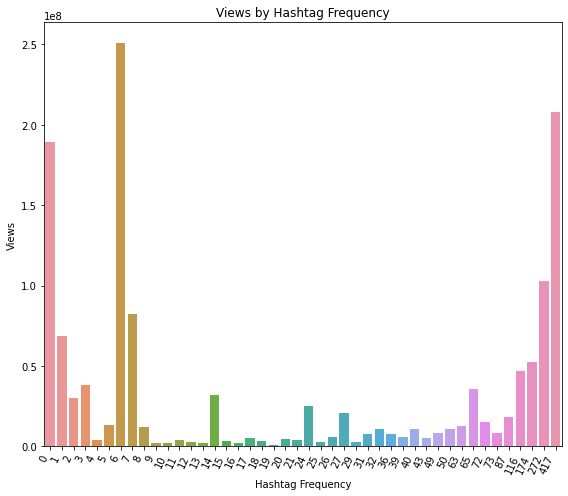

In [44]:
import seaborn as sns


plt.figure(figsize=(8, 7))
ax = sns.barplot(x=hashtag_freqs, y=hashtag_views)
plt.title('Views by Hashtag Frequency')
plt.xlabel('Hashtag Frequency')
plt.ylabel('Views')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right")
plt.tight_layout()
